In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Loan Default Dataset

https://www.kaggle.com/datasets/yasserh/loan-default-dataset

In [54]:
# Run below for jovian access (Kaggle API)
# !pip install jovian --upgrade --quiet

In [55]:

# import jovian

PRE-PROCESSING/EDA:


In [56]:
df = pd.read_csv("~/Desktop/SI_370/data/Loan_Default.csv")

# New Section

In [57]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


# New Section

In [58]:
# from google.colab import drive
# drive.mount('/content/drive')

In [59]:
# columns to lower case
df.columns = df.columns.str.lower()

In [60]:
# from google.colab import drive
# drive.mount('/content/drive')
# SHOULDNT NEED SINCE WE ADDED LOCAL FILE "Content"

In [61]:
df.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

Numerous variables in this data set have ambiguous values. We'll expand on these:

- loan_limit:
  - cf (credit facility)
  - ncf (non-credit facility)
- approv_in_adv:
  - pre (pre-approved)
  - nopre (not pre-approved)


STATISTICAL ANALYSIS:

In [62]:
df.shape

(148670, 34)

In [63]:
df.describe()

,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [64]:
df.dtypes

id                             int64
year                           int64
loan_limit                    object
gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
credit_worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
interest_rate_spread         float64
upfront_charges              float64
term                         float64
neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
secured_by                    object
total_units                   object
income                       float64
credit_type                   object
credit_score                   int64
co-applicant_credit_type      object
a

In [65]:
df.isnull().sum()

id                               0
year                             0
loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

Percentage of values missing for each column:

In [66]:
Features_with_NaN=[col for col in df.columns if df[col].isnull().sum()>0]
for column in Features_with_NaN:
    print(column,np.round(df[column].isnull().mean(),2),'% missing values')

loan_limit 0.02 % missing values
approv_in_adv 0.01 % missing values
loan_purpose 0.0 % missing values
rate_of_interest 0.25 % missing values
interest_rate_spread 0.25 % missing values
upfront_charges 0.27 % missing values
term 0.0 % missing values
neg_ammortization 0.0 % missing values
property_value 0.1 % missing values
income 0.06 % missing values
age 0.0 % missing values
submission_of_application 0.0 % missing values
ltv 0.1 % missing values
dtir1 0.16 % missing values


<Axes: >

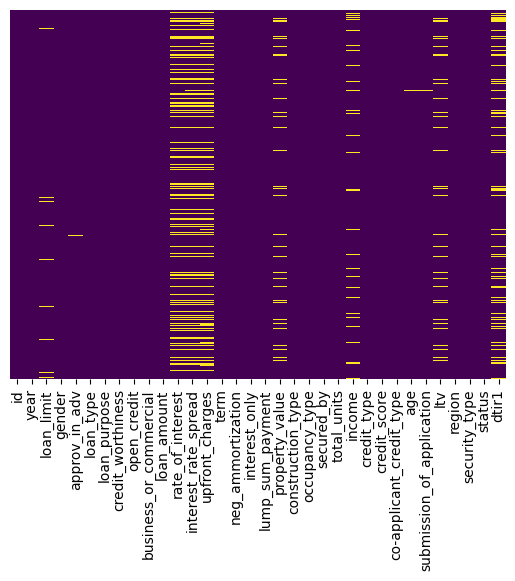

In [67]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [68]:
def count_features(data):
    #Getting column with objects dtype
    objects= data.select_dtypes(include=['object']).columns
    numerical=data.select_dtypes(include=['int64']).columns
    floating=data.select_dtypes(include=['float64']).columns

    print('Numerical features are :',len(numerical))
    print('Objects features are  :',len(objects))
    print('Floating features are :',len(floating))

In [69]:
count_features(df)

Numerical features are : 5
Objects features are  : 21
Floating features are : 8


In [70]:
obj=[]
for i in df.columns:
    if df[i].dtype=='object':
        obj.append(i)
obj

['loan_limit',
 'gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'credit_worthiness',
 'open_credit',
 'business_or_commercial',
 'neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'region',
 'security_type']

In [71]:
for i in range(len(obj)):
    print(obj[i],df[obj[i]].unique())

loan_limit ['cf' nan 'ncf']
gender ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv ['nopre' 'pre' nan]
loan_type ['type1' 'type2' 'type3']
loan_purpose ['p1' 'p4' 'p3' 'p2' nan]
credit_worthiness ['l1' 'l2']
open_credit ['nopc' 'opc']
business_or_commercial ['nob/c' 'b/c']
neg_ammortization ['not_neg' 'neg_amm' nan]
interest_only ['not_int' 'int_only']
lump_sum_payment ['not_lpsm' 'lpsm']
construction_type ['sb' 'mh']
occupancy_type ['pr' 'sr' 'ir']
secured_by ['home' 'land']
total_units ['1U' '2U' '3U' '4U']
credit_type ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type ['CIB' 'EXP']
age ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
submission_of_application ['to_inst' 'not_inst' nan]
region ['south' 'North' 'central' 'North-East']
security_type ['direct' 'Indriect']


In [72]:
df['status'].value_counts()

status
0    112031
1     36639
Name: count, dtype: int64

In [73]:
# Checking count of Eligibility by gender
gender_status=df.groupby(['gender','status']).size().reset_index().rename(columns={0:'Total Count'})
gender_status

,gender,status,Total Count
0,Female,0,20418
1,Female,1,6848
2,Joint,0,33466
3,Joint,1,7933
4,Male,0,31255
5,Male,1,11091
6,Sex Not Available,0,26892
7,Sex Not Available,1,10767


<Axes: xlabel='gender', ylabel='Total Count'>

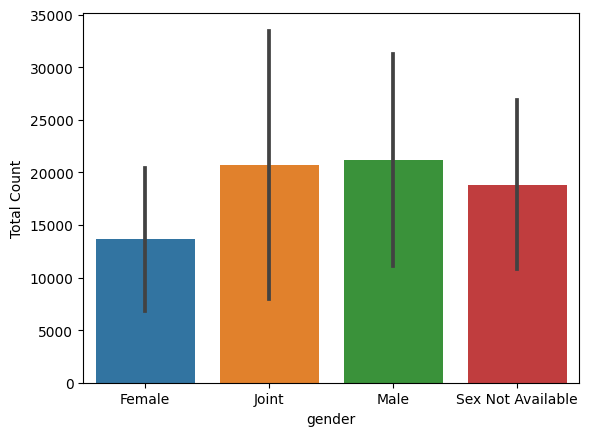

In [74]:
sns.barplot(x='gender',y='Total Count',data=gender_status)

([<matplotlib.patches.Wedge at 0x133f63510>,
 [Text(0.41593847309550813, 1.0183296060701454, 'p3'),
  Text(-1.0201060611602613, -0.4115624180900115, 'p4'),
  Text(0.7103225292004668, -0.8399058902700064, 'p1'),
  Text(1.0973637714591258, -0.07611013788585434, 'p2')],
 [Text(0.22687553077936803, 0.5554525124018974, '37.66%'),
  Text(-0.556421487905597, -0.2244885916854608, '36.89%'),
  Text(0.3874486522911637, -0.4581304856018216, '23.25%'),
  Text(0.598562057159523, -0.04151462066501145, '2.20%')])

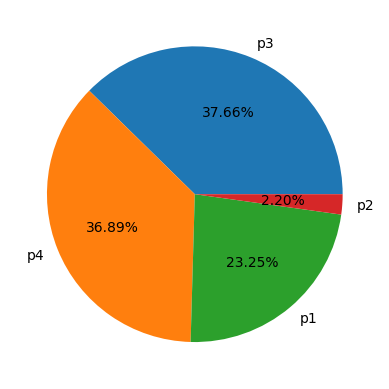

In [75]:
loan_purpose=df.loan_purpose.value_counts().index
val=df.loan_purpose.value_counts().values
plt.pie(val,labels=loan_purpose,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x12da1f910>,
 [Text(0.8162589905762546, 0.7373745725907791, '45-54'),
  Text(-0.6147004717561578, 0.91221890466201, '35-44'),
  Text(-1.0110134082821514, -0.4334188370083934, '55-64'),
  Text(-0.042281625578664356, -1.0991870924180405, '65-74'),
  Text(0.7933189813031434, -0.7620006521677938, '25-34'),
  Text(1.0761989149209197, -0.2275871163379755, '>74'),
  Text(1.0995598325134772, -0.031115506149411727, '<25')],
 [Text(0.445232176677957, 0.4022043123222431, '23.39%'),
  Text(-0.33529116641244966, 0.49757394799745996, '22.10%'),
  Text(-0.5514618590629915, -0.2364102747318509, '21.91%'),
  Text(-0.023062704861089644, -0.5995565958643856, '13.97%'),
  Text(0.4327194443471691, -0.4156367193642511, '12.89%'),
  Text(0.5870175899568653, -0.12413842709344117, '4.83%'),
  Text(0.5997599086437148, -0.016972094263315484, '0.90%')])

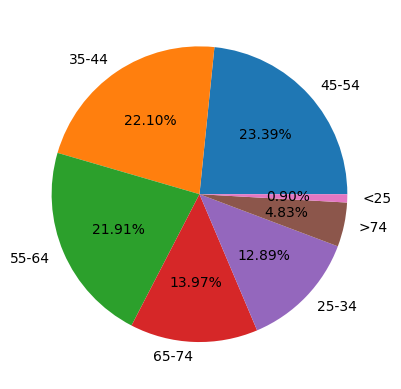

In [76]:
age_names=df.age.value_counts().index
age_val=df.age.value_counts().values
plt.pie(age_val,labels=age_names[:],autopct='%1.2f%%')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   credit_worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  interest_rate_spread       112031 non-null  float64
 13  upfront_charges            10

In [78]:
df.head()

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,...,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [79]:
# CHECKING FOR NULL VALUES TO ENSURE THAT PAST PIPELINES WERE EFFECTIVE IN DATASET

df.isnull().sum()

id                               0
year                             0
loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

<Axes: >

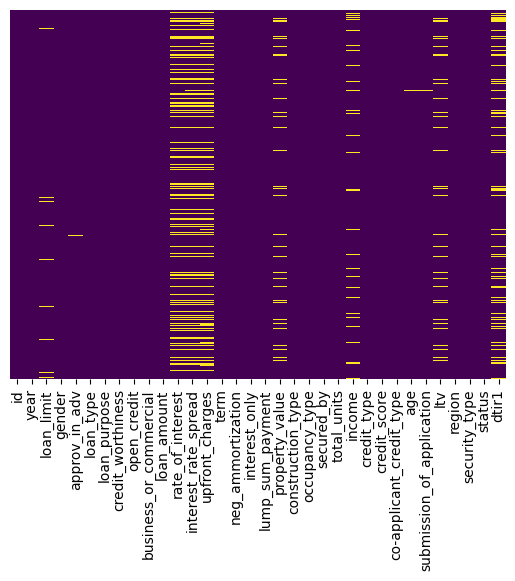

In [80]:
#NULL VALUE HEATMAP - INSPIRED BY https://www.kaggle.com/code/muhammaadmuzammil008/eda-feature-engineering-model-building?scriptVersionId=144030898&cellId=38

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [81]:
#CLEANING DATA - REMOVING ALL COLUMNS THAT ARE UNNECESSARY/PROVE NO CORRELATION

#Dropping id - each id unique to entry, therefore has no correlation to predictive model
df.drop('id', axis = 1, inplace = True)

In [82]:
#Making Labels & Features with Loan_Default.csv

#Label column of the dataset is the "Status" Column

df_y = df['status']

#Features
df_x = df.drop(['status'], axis = 1)

In [83]:
#NOW, AFTER CLEANING THE DATA WE HAVE TO SPLIT INTO TRAINING AND TESTING SETS
from sklearn.model_selection import train_test_split

#SPLITTING TRAIN AND TEST DATA 80/20 FOR DATASET SIZE PURPOSES

df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=50)

In [84]:
#CREATING DATA PIPELINE USING TRAIN DATASET

from sklearn.pipeline import Pipeline

cats = df_x_train.select_dtypes(include=['object']).columns
nums = df_x_train.select_dtypes(exclude=['object']).columns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [85]:
#Transforming null values into average values of all non-null values to increasde predictability

cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder())])
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

In [86]:
from sklearn.compose import ColumnTransformer


ct = ColumnTransformer([('cat', cat_pipe, cats), ('num', num_pipe, nums)])

In [87]:
fit_transformed_features = ct.fit_transform(df_x_train)
test_transformed_features = ct.fit_transform(df_x_test)

In [89]:
X_standardized = StandardScaler().fit_transform(fit_transformed_features)

n_components = 5 # Specify the number of principal components to retain
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_standardized)

explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_ratio

array([0.08698851, 0.06520603, 0.05125293, 0.04323911, 0.04226077])

In [136]:
X_standardized = StandardScaler().fit_transform(test_transformed_features)

n_components = 5 # Specify the number of principal components to retain
pca_test = PCA(n_components=n_components)
X_pca_test = pca_test.fit_transform(X_standardized)

In [90]:
fit_transformed_features.shape

(118936, 70)

In [91]:
def multiplePlots( series ):

    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)

    # Histogram
    sns.distplot(series, ax=axs[0,0])

    # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(x=current, y=lag, fit_reg=False, ax=axs[0,1])

    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")

    # QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    ax = sns.regplot(x=xr, y=qntls, ax=axs[1, 0], scatter_kws={"s": 10}, fit_reg=False)


    # Run sequence
    ax = sns.regplot(x=np.arange(len(series)), y=series, ax=axs[1, 1], scatter_kws={"s": 10}, fit_reg=False)

    ax.set_ylabel("val")
    ax.set_xlabel("i")


In [92]:
from scipy import stats

In [93]:
objects= df.select_dtypes(include=['object']).columns
integers=df.select_dtypes(include=['int64']).columns
floating=df.select_dtypes(include=['float64']).columns

In [94]:
floating = list(floating)
integers

Index(['year', 'loan_amount', 'credit_score', 'status'], dtype='object')

In [95]:
floating.append('loan_amount')

In [96]:
for i in floating:
  print(i)

rate_of_interest
interest_rate_spread
upfront_charges
term
property_value
income
ltv
dtir1
loan_amount


/var/folders/xn/33cd_qmn4dj1zbrrljsw6kzh0000gn/T/ipykernel_21580/1769362940.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(series, ax=axs[0,0])
/var/folders/xn/33cd_qmn4dj1zbrrljsw6kzh0000gn/T/ipykernel_21580/1769362940.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(series, ax=axs[0,0]

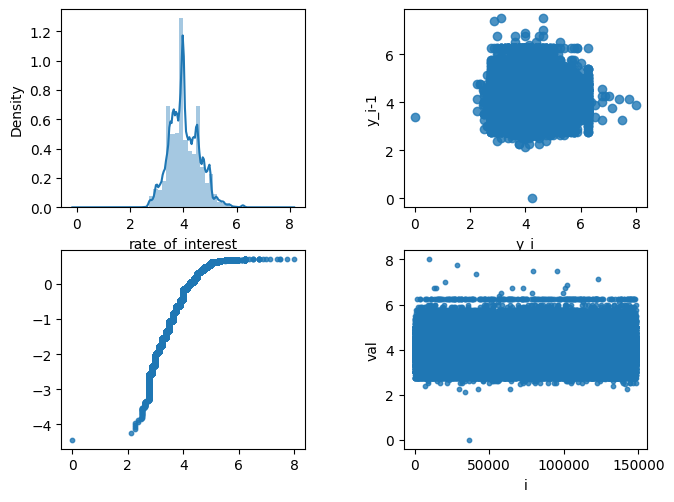

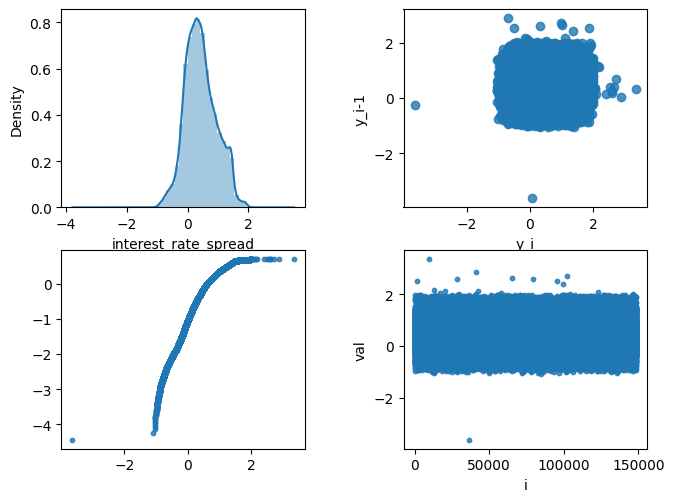

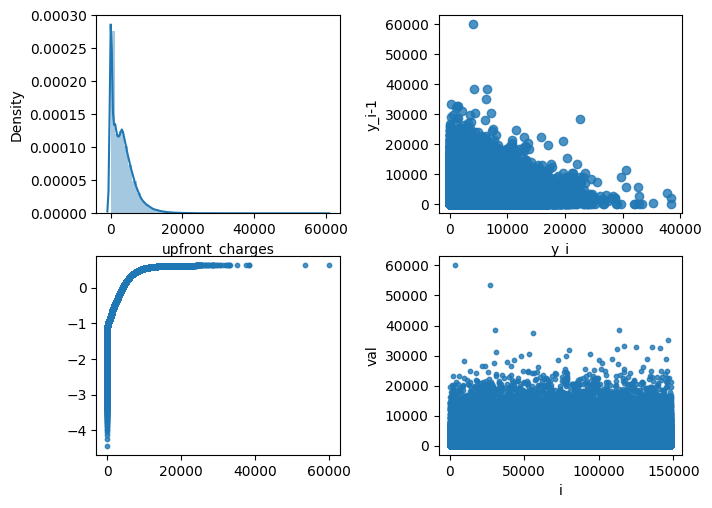

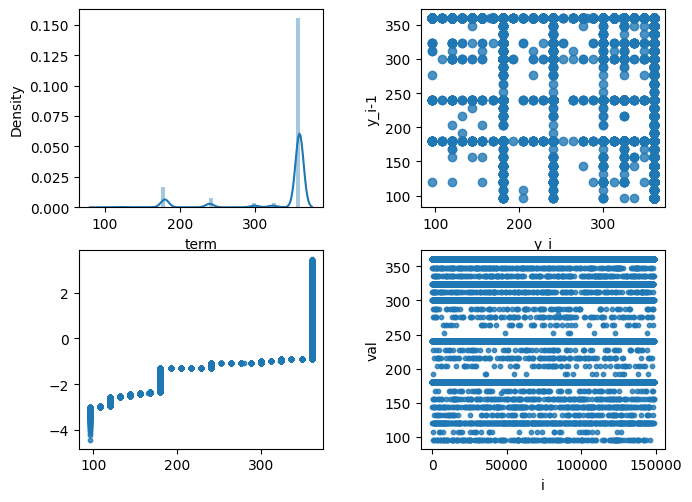

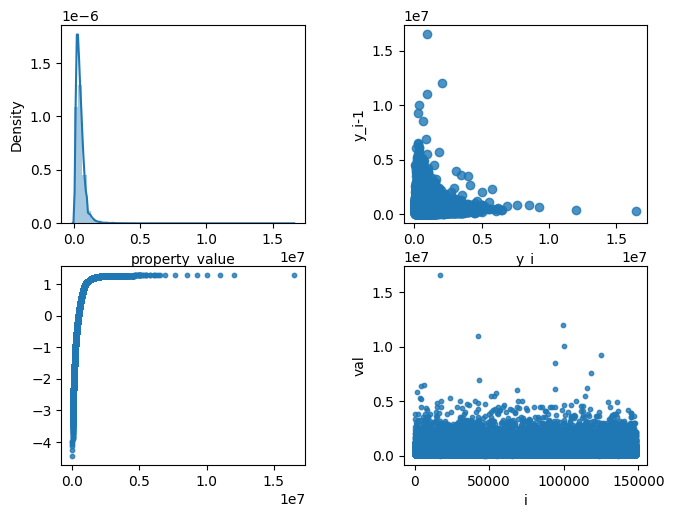

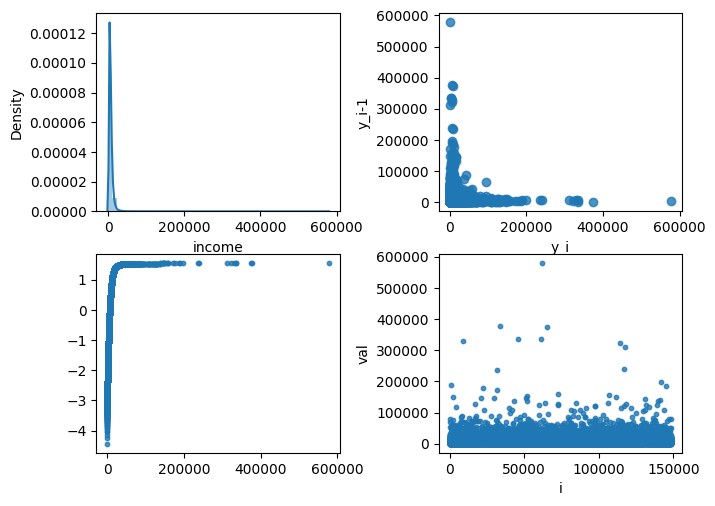

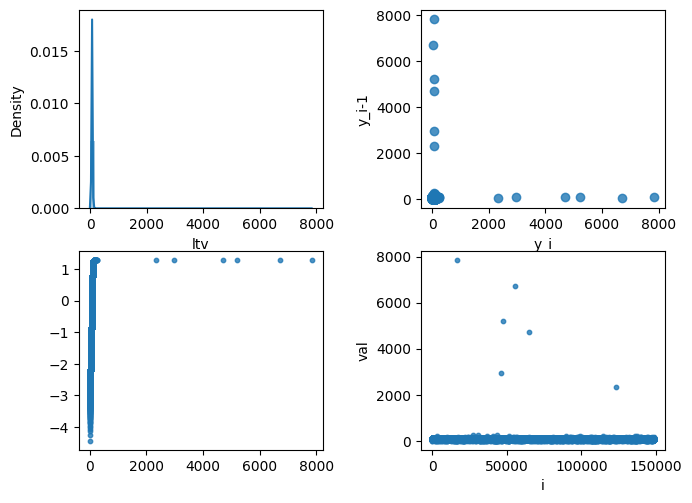

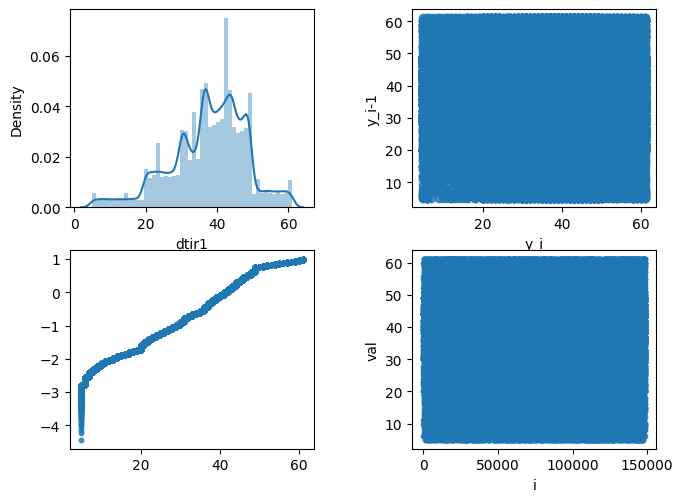

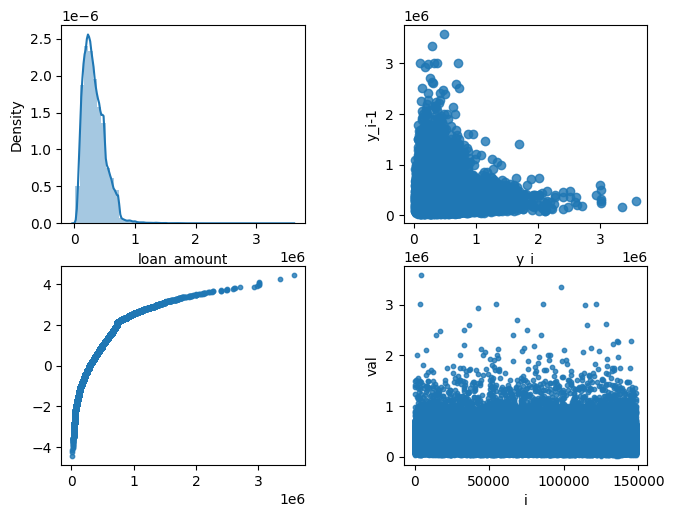

In [97]:
for numerical_column in floating:
  multiplePlots(df[numerical_column])


In [98]:
objects = list(objects)

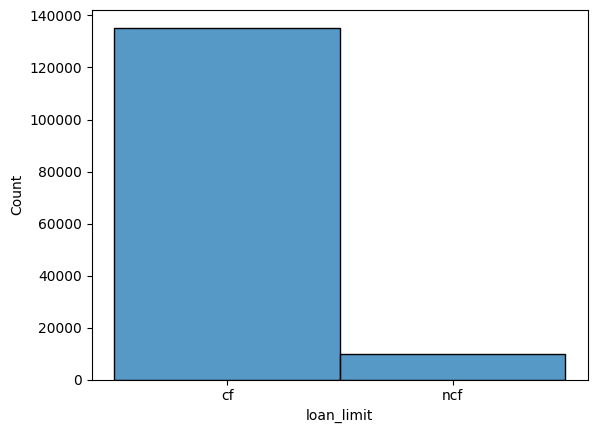

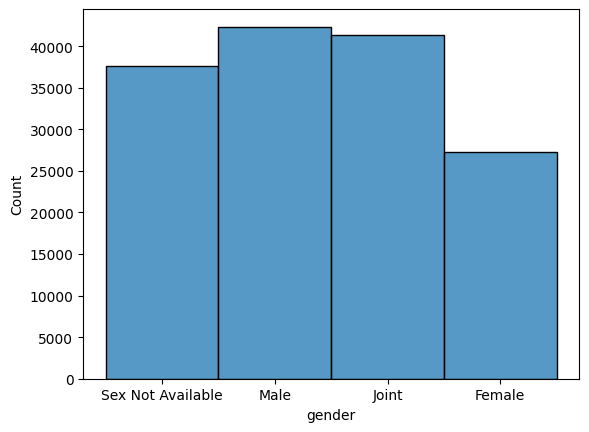

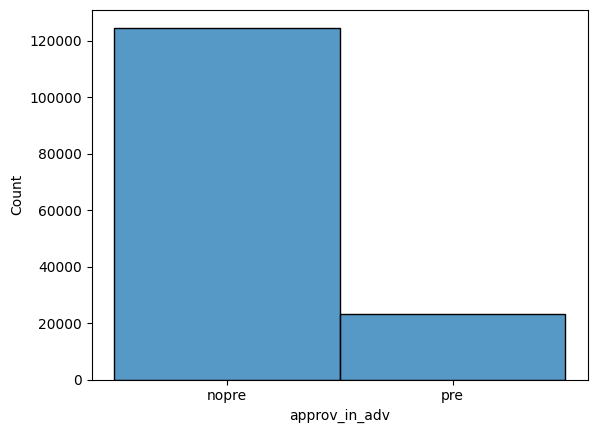

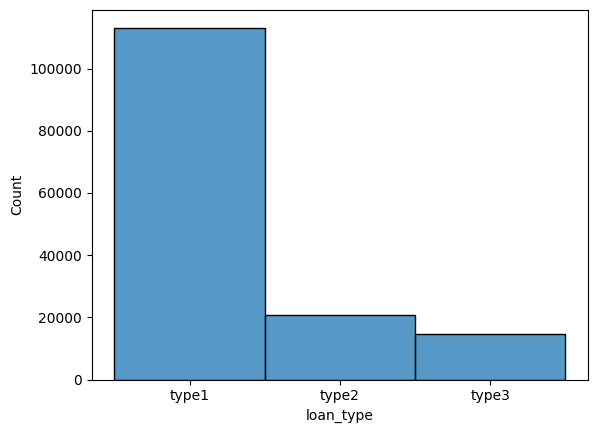

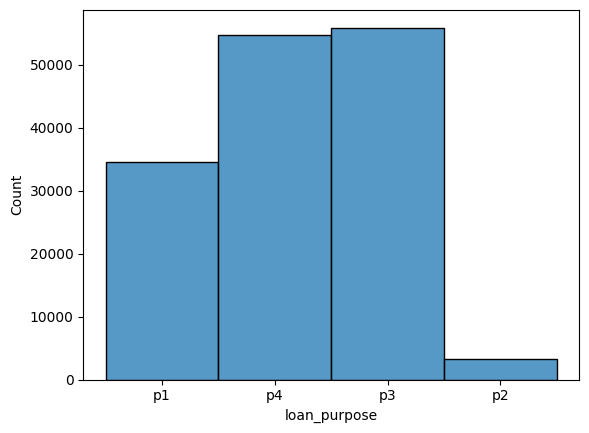

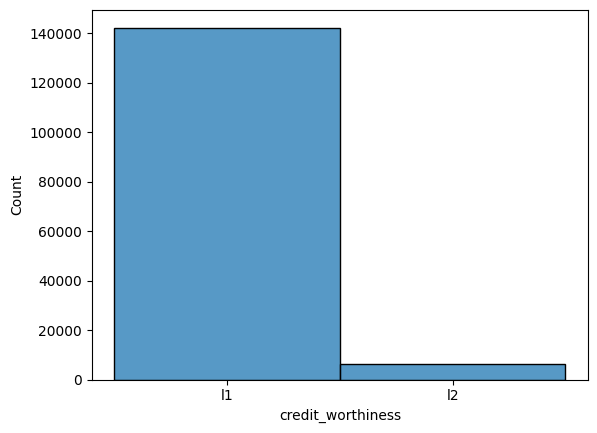

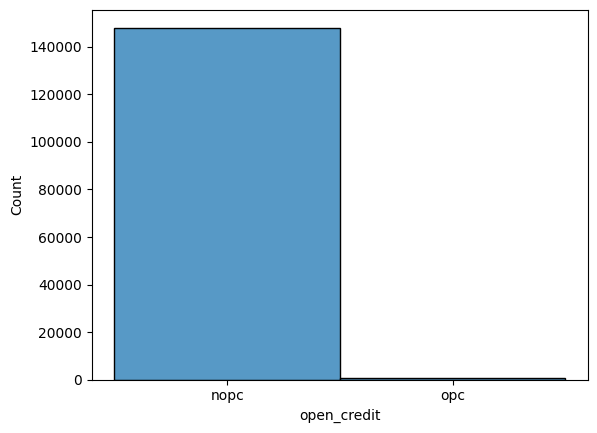

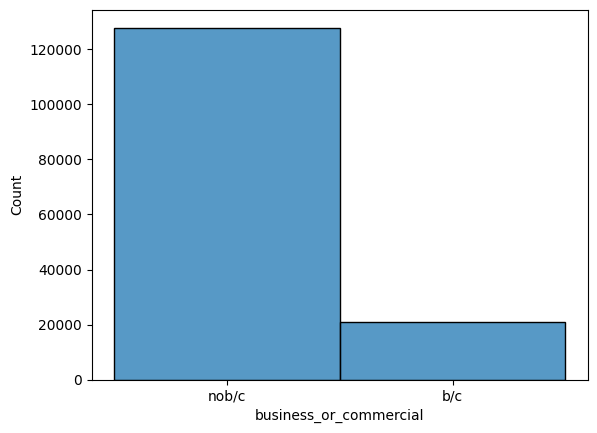

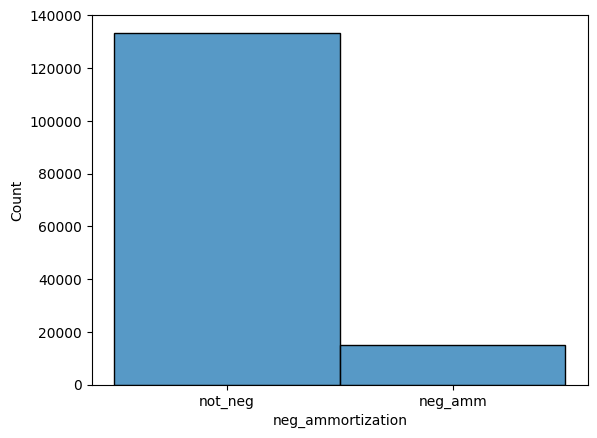

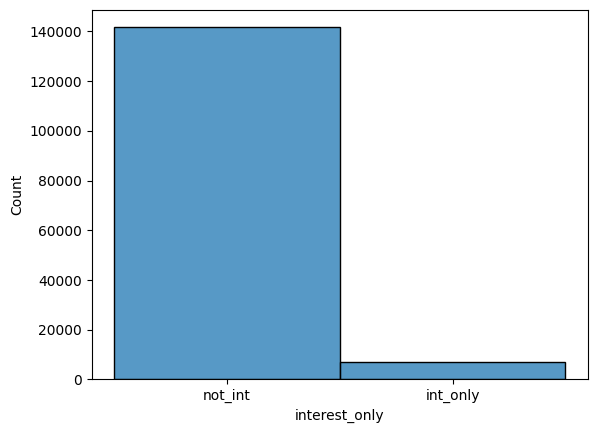

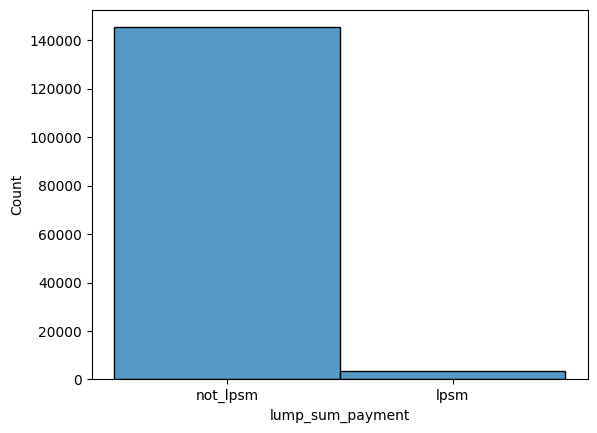

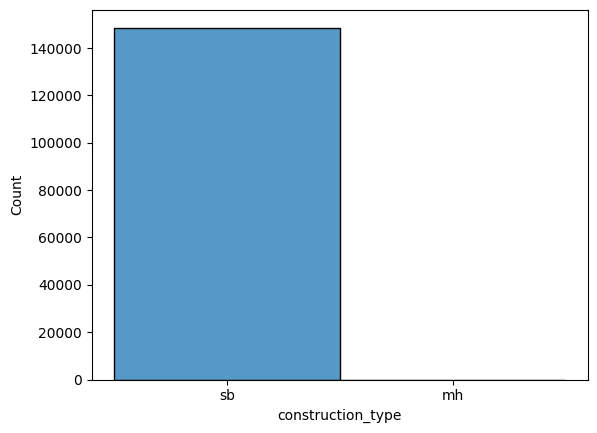

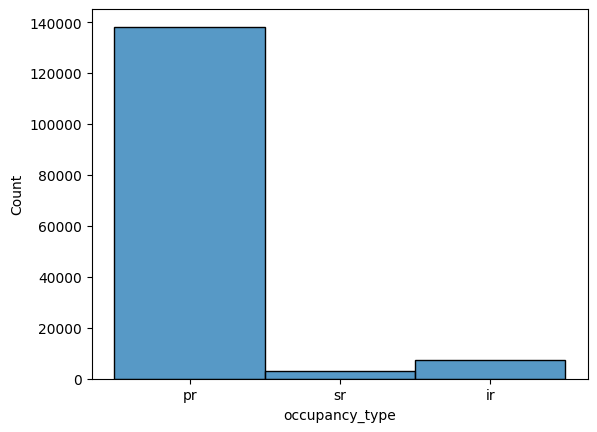

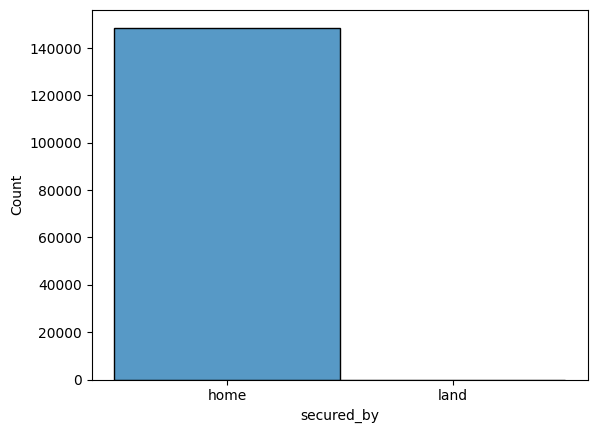

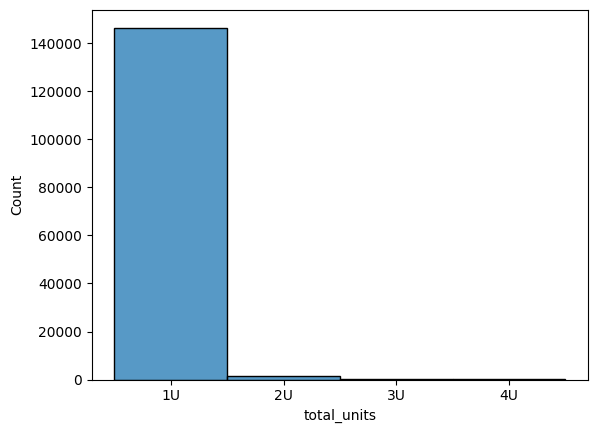

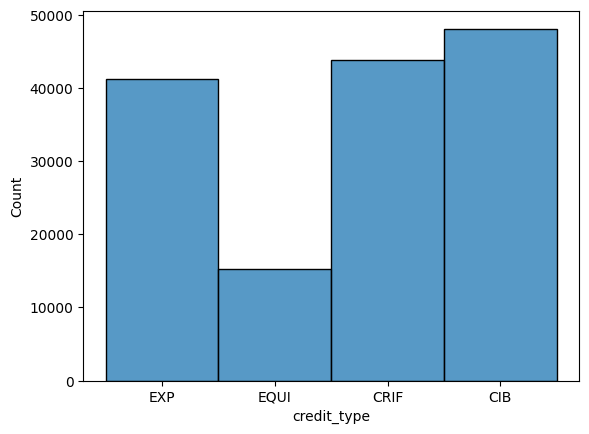

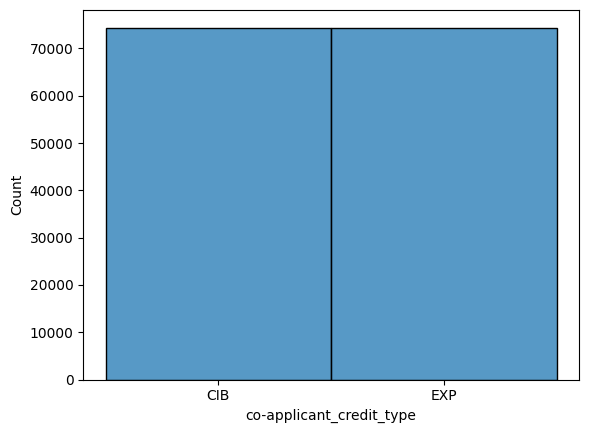

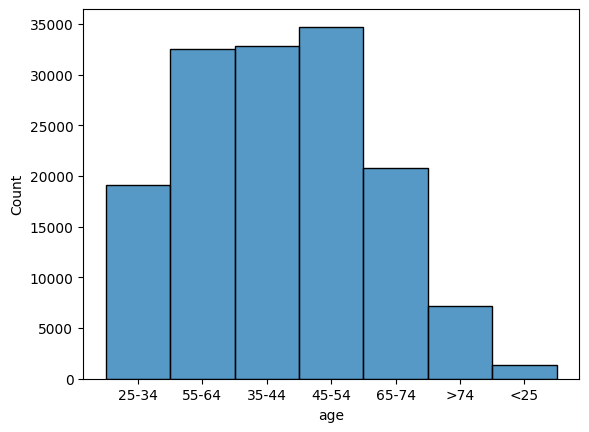

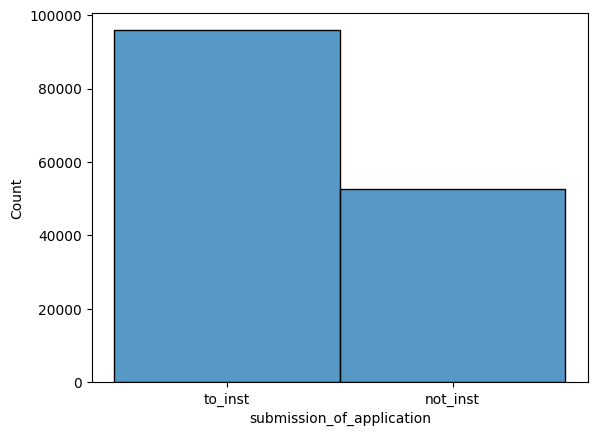

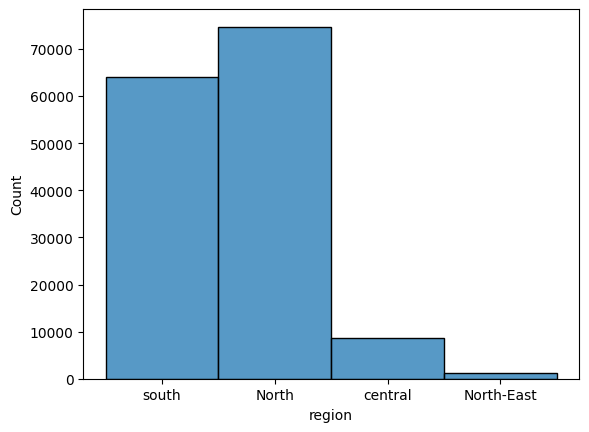

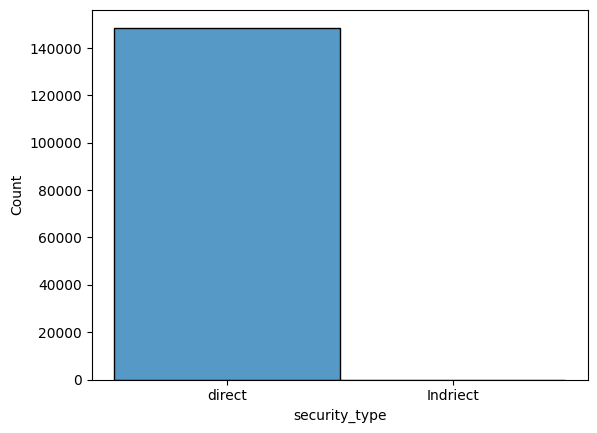

In [99]:
for i in objects:
  sns.histplot(df[i])
  plt.show()

In [100]:
df['secured_by'].value_counts()

secured_by
home    148637
land        33
Name: count, dtype: int64

INDIVIDUAL CLASSIFIERS:

In [101]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier


In [102]:
X_pca

array([[ 6.82222722e-02, -2.27406360e+00,  4.53466605e+00,
        -1.68382414e+00,  1.00109183e+00],
       [-6.18095187e-02, -9.97894560e-02, -1.68837708e+00,
         9.55182653e-01, -2.16086417e+00],
       [-6.12243051e-02,  2.53945475e+00,  1.59761521e+00,
        -2.40307404e+00,  1.28758960e+00],
       ...,
       [-8.51053400e-02,  2.40517013e+00,  1.71318548e+00,
         5.72123472e-01,  9.43854790e-02],
       [ 2.01353628e-03, -1.63003154e+00, -1.18969178e+00,
        -1.15634935e+00, -1.66389385e-01],
       [-3.08470758e-02, -1.70289957e+00, -3.01175956e+00,
         1.36792289e+00, -1.62487908e+00]])

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


# List of classifiers
# List of classifiers with adjusted parameters for faster training
classifiers = [
    LogisticRegression(max_iter=1000),  # Increase max_iter
    DecisionTreeClassifier(max_depth=10),  # Limit tree depth
    RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1),  # Limit tree depth and use parallelization
    AdaBoostClassifier(n_estimators=50),  # Reduce the number of weak learners
    KNeighborsClassifier(n_neighbors=5),  # Use a smaller number of neighbors
    GaussianNB(),
    MLPClassifier(max_iter=1000),  # Increase max_iter
]

# Evaluate each classifier using cross-validation
for clf in classifiers:
    clf_name = clf.__class__.__name__
    scores = cross_val_score(clf, X_pca, df_y_train, cv=5, scoring='accuracy')  # You can change the scoring metric based on your task
    print(f'{clf_name}: Accuracy - {scores.mean():.4f}, Standard Deviation - {scores.std():.4f}')


LogisticRegression: Accuracy - 0.7717, Standard Deviation - 0.0017
DecisionTreeClassifier: Accuracy - 0.7934, Standard Deviation - 0.0018
RandomForestClassifier: Accuracy - 0.8068, Standard Deviation - 0.0014
AdaBoostClassifier: Accuracy - 0.7726, Standard Deviation - 0.0021
KNeighborsClassifier: Accuracy - 0.8214, Standard Deviation - 0.0024
GaussianNB: Accuracy - 0.7554, Standard Deviation - 0.0001
MLPClassifier: Accuracy - 0.8244, Standard Deviation - 0.0027


HYPERTUNING:

In [113]:
from sklearn.model_selection import GridSearchCV

In [119]:
param_grids = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    {'max_depth': [5, 10, 15, 20]},
    {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]},
    {'n_estimators': [50, 100, 150]},
    {'n_neighbors': [3, 5, 7, 10]},
    {},  # No hyperparameters for GaussianNB
    {'batch_size': [50, 100, 200], 'max_iter': [500, 1000, 1500]},
]
parameters = {}
# Perform Grid Search with 5-fold cross-validation for each classifier
for clf, params in zip(classifiers, param_grids):
    grid_search = GridSearchCV(clf, params, cv=5, n_jobs=-1)
    grid_search.fit(X_pca, df_y_train)
    parameters[clf.__class__.__name__] = grid_search.best_params_
    # Print the best hyperparameters and corresponding score
    print(f"Best hyperparameters for {clf.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_}")

    

Best hyperparameters for LogisticRegression: {'C': 1000}
Best cross-validation score: 0.7725667648907116
Best hyperparameters for DecisionTreeClassifier: {'max_depth': 15}
Best cross-validation score: 0.8037684047965943
Best hyperparameters for RandomForestClassifier: {'max_depth': 15, 'n_estimators': 150}
Best cross-validation score: 0.8357099672688546
Best hyperparameters for AdaBoostClassifier: {'n_estimators': 100}
Best cross-validation score: 0.7763839590066226
Best hyperparameters for KNeighborsClassifier: {'n_neighbors': 10}
Best cross-validation score: 0.8276131744423735
Best hyperparameters for GaussianNB: {}
Best cross-validation score: 0.7554062680709774
Best hyperparameters for MLPClassifier: {'batch_size': 200, 'max_iter': 1500}
Best cross-validation score: 0.8245443027173321


In [131]:
parameters

{'LogisticRegression': {'C': 1000},
 'DecisionTreeClassifier': {'max_depth': 15},
 'RandomForestClassifier': {'max_depth': 15, 'n_estimators': 150},
 'AdaBoostClassifier': {'n_estimators': 100},
 'KNeighborsClassifier': {'n_neighbors': 10},
 'GaussianNB': {},
 'MLPClassifier': {'batch_size': 200, 'max_iter': 1500}}

In [133]:
tuned_clfs = [('lr', LogisticRegression(C = parameters['LogisticRegression']['C'])), ('dt', DecisionTreeClassifier(max_depth = parameters['DecisionTreeClassifier']['max_depth'])), ('rf', RandomForestClassifier(max_depth=parameters['RandomForestClassifier']['max_depth'], n_estimators=parameters['RandomForestClassifier']['n_estimators'])), ('ada', AdaBoostClassifier(n_estimators=parameters['AdaBoostClassifier']['n_estimators'])), ('kn', KNeighborsClassifier(n_neighbors=parameters['KNeighborsClassifier']['n_neighbors'])), ('gnb', GaussianNB()),  ('mlp', MLPClassifier(batch_size=parameters['MLPClassifier']['batch_size'], max_iter=parameters['MLPClassifier']['max_iter']))]










In [134]:
vc = VotingClassifier(estimators=tuned_clfs, voting='soft', weights=[1, 2, 2, 1, 2, 1, 2])

In [135]:
vc.fit(X_pca, df_y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1000)),
                             ('dt', DecisionTreeClassifier(max_depth=15)),
                             ('rf',
                              RandomForestClassifier(max_depth=15,
                                                     n_estimators=150)),
                             ('ada', AdaBoostClassifier(n_estimators=100)),
                             ('kn', KNeighborsClassifier(n_neighbors=10)),
                             ('gnb', GaussianNB()),
                             ('mlp',
                              MLPClassifier(batch_size=200, max_iter=1500))],
                 voting='soft', weights=[1, 2, 2, 1, 2, 1, 2])

In [137]:
X_pca_test

array([[-0.05891211, -0.15577974, -0.43863997,  0.27283272, -0.23950602],
       [-0.15833223,  2.34595918, -0.99066918, -2.04883095,  0.91269345],
       [-0.07858675,  0.39676568,  2.92906276, -1.56675956,  2.19593705],
       ...,
       [ 0.16489388, -4.27586137, -1.67975573,  1.94175872, -1.50656777],
       [-0.10694968,  1.52377925, -0.33154675, -2.36767277,  0.31359985],
       [-0.00844424,  0.21137068,  0.12134419, -2.00418068,  1.67217608]])

In [139]:
df_y_test

16777     1
99743     0
93849     0
112129    1
145265    0
         ..
21153     1
28254     0
49953     0
85896     0
107367    0
Name: status, Length: 29734, dtype: int64

In [142]:
df_y_test

16777     1
99743     0
93849     0
112129    1
145265    0
         ..
21153     1
28254     0
49953     0
85896     0
107367    0
Name: status, Length: 29734, dtype: int64

In [140]:
predictions = vc.predict(X_pca_test)

In [143]:
predictions

array([1, 0, 0, ..., 1, 0, 0])

In [145]:
print("\nTesting Metrics:")
print("Confusion Matrix:")
print(confusion_matrix(predictions, df_y_test))
print("Accuracy:", accuracy_score(predictions, df_y_test))
print("Precision:", precision_score(predictions, df_y_test, average='macro'))
print("Recall:", recall_score(predictions, df_y_test, average='macro'))
print("F1 Score:", f1_score(predictions, df_y_test, average='macro'))


Testing Metrics:
Confusion Matrix:
[[18955  5256]
 [ 3397  2126]]
Accuracy: 0.7089863455976323
Precision: 0.568010190441762
Recall: 0.5839221593026898
F1 Score: 0.571825224889555


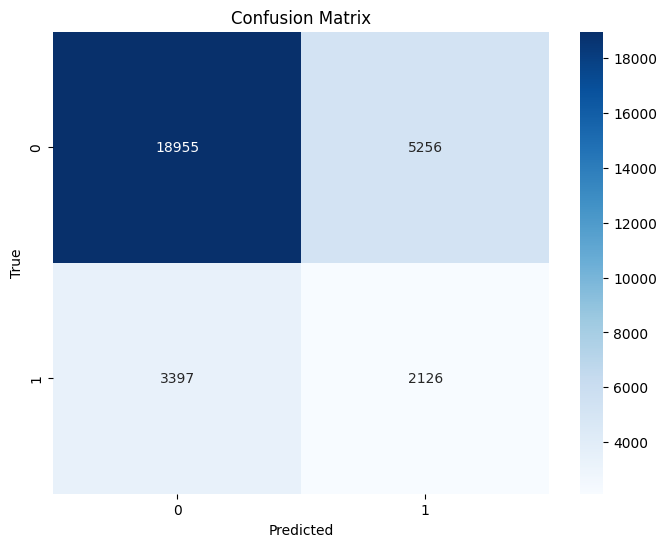

In [147]:
cm = confusion_matrix(predictions, df_y_test)

# Set up the Matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and display the plot
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [154]:
csv_file_path = 'submit_file.csv'

In [155]:
sample_data = df.head(10000)

In [156]:
sample_data.to_csv(csv_file_path, index=False)